# データセットの用意

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
import japanize_matplotlib
import pandas as pd
sns.set
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

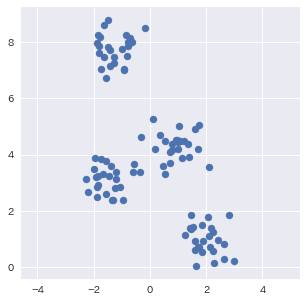

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(5,5))
plt.scatter(X[:,0], X[:,1], marker='o', s=50)

plt.axis('equal')
plt.show()

# kemeansクラス用意

In [72]:
class ScratchKmeans():
    
    #パラメータの定義
 
    
    #アトリビュート
    #SSE_LIST :描画用
    def __init__(self,k,data):
        self.k = k
        self.centroids  = np.zeros(self.k)
        self.pred = np.full(len(data), None)
        self.SSE_LIST = np.zeros(self.k)
        
    
    def fit_predict(self,data,num=15):
        count = 0
        label_list = np.unique(range(self.k))
        #重心の初期値のインデックス。（ランダムに４つ選ぶ）
        centroid_index = np.random.choice(data.shape[0], self.k, replace=False)
        # 重心の初期の座標
        self.centroids = data[centroid_index]
        while(count < num ):
            for i in range(len(X)):
                #numpy配列のインデックスは０から始まるので-1
                v = data[i]    
                min_norm=10**10
                for k,cent in enumerate (self.centroids):
                    norm = np.linalg.norm(cent - v)
                    #それまでの距離より小さかったら更新
                    if min_norm  > norm:
                        min_k = k
                        self.pred[i] = min_k
                        #距離が最小の値を更新
                        min_norm = norm  
                #重心の計算
                #　各データ
            for label in label_list:
                #ラベルのインデックスを取得
                index = np.where(self.pred==label)
                #取得したインデックスをXに対応する形でスライス
                #それx,y軸それぞれを合計を計算
                x_sum = data[index,0].sum()
                y_sum = data[index,1].sum()
                #各ラベルの要素数を取得
                num = data[index,0].shape[1]  
                #x,y座標それぞれの重心を算出
                x_c = x_sum / num 
                y_c = y_sum/ num
                #重心の座標を更新
                self.centroids[label] =np.array([x_c, y_c])
            count +=1
        return self.pred,self.centroids


    def calc_sse(self,data):
        #k回SSEを計算する
        for i  in range(1,self.k+1):
            pred ,centroids = fit(data,i)   
            #結合できるようにリシェイプ
            pred = np.reshape(pred,(data.shape[0],1))
            #結合して変数に格納
            combined = np.hstack((pred,data)).astype(float)
            #SSEの初期化
            SSE = 0
        #各k番目のSSEを計算
        #各クラスターごとの中心点との２乗の誤差を足しあげる
            for cluster in range(i):
                SSE += sum((combined[combined [:,0]==cluster][:,1] - centroids[cluster,0])**2 + (combined [combined[:,0]==cluster][:,2] - centroids[cluster,1])**2)
            self.SSE_LIST[i-1] = SSE
        #k番目のSSEを保存する

    def show_elbow(self):
        left = range(1,self.k+1)
        plt.title('エルボー図')
        plt.ylabel('SSE')
        plt.xlabel('クラスタ数')
        plt.plot(left, self. SSE_LIST)
        
    

In [73]:
km = ScratchKmeans(k =4,data=X)

In [69]:
km.fit_predict(X)

(array([3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 2, 1, 0,
        3, 2, 3, 3, 3, 3, 1, 2, 2, 0, 2, 1, 3, 3, 0, 1, 0, 3, 3, 3, 0, 3,
        3, 0, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 2, 2, 0, 0, 1, 2, 3, 1, 0,
        3, 3, 1, 3, 0, 1, 3, 0, 3, 3, 3, 3, 2, 1, 2, 0, 3, 3, 2, 3, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3], dtype=object),
 array([[-1.26811733,  7.76378266],
        [ 1.81056256,  1.72615385],
        [ 2.11264047,  0.65345836],
        [-0.3255195 ,  3.72390954]]))

In [70]:
km.calc_sse(X)

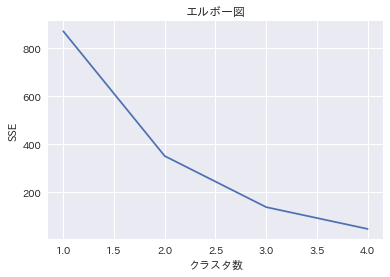

In [71]:
km.show_elbow()